In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("datasets/academic.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: ylabel='math score'>

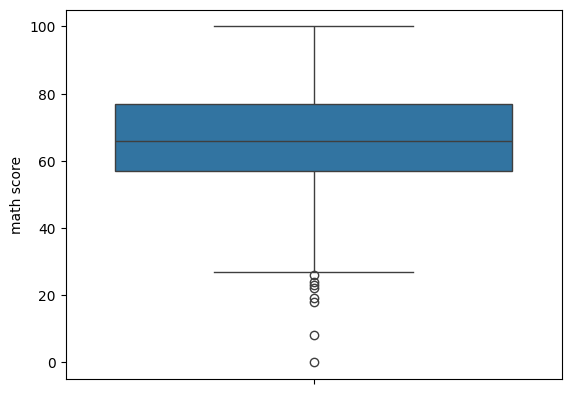

In [9]:
sns.boxplot(data['math score'])

<Axes: ylabel='reading score'>

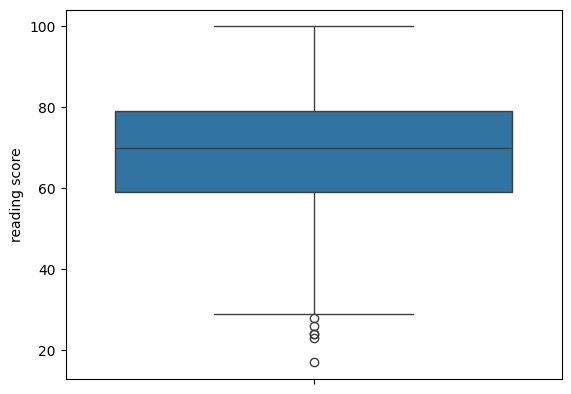

In [10]:
sns.boxplot(data['reading score'])

<Axes: ylabel='writing score'>

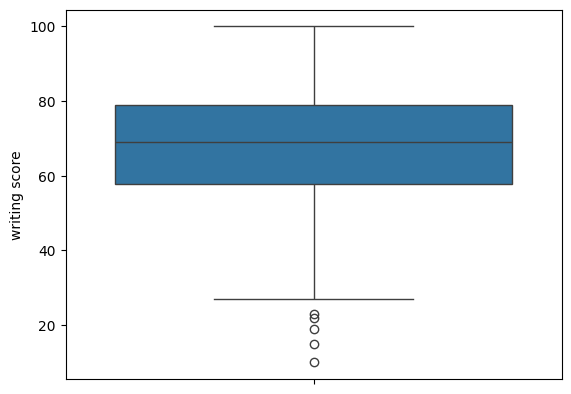

In [11]:
sns.boxplot(data['writing score'])

In [13]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [18]:
def remove_outliers(feature: str):
    global data
    q1, q3 = np.percentile(data[feature], [25, 75])
    iqr = q3 - q1
    data = data[(data[feature] <= q3 + 1.5*iqr) & (data[feature] >= q1 - 1.5*iqr)]

In [19]:
remove_outliers('math score')
remove_outliers('reading score')
remove_outliers('writing score')

<Axes: ylabel='writing score'>

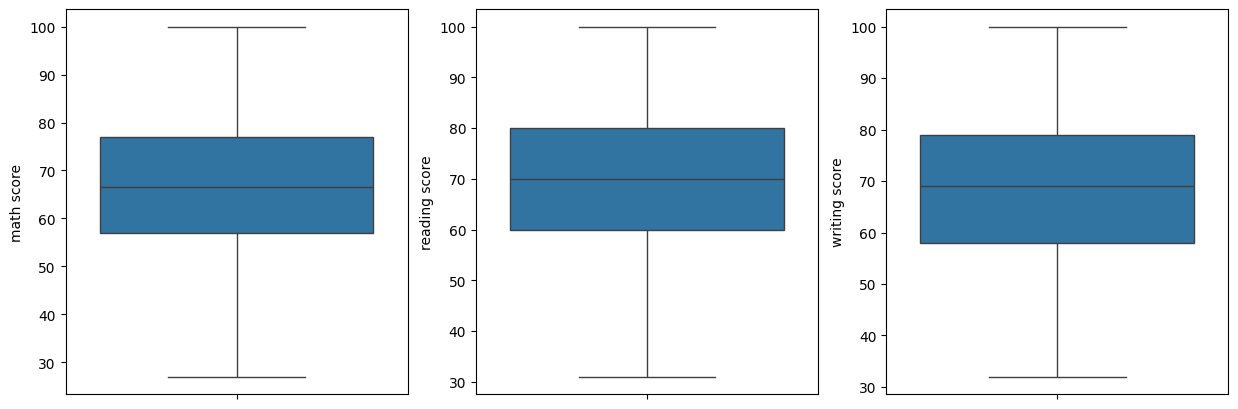

In [27]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))

sns.boxplot(data['math score'], ax = axes[0])
sns.boxplot(data['reading score'], ax = axes[1])
sns.boxplot(data['writing score'], ax = axes[2])

<Axes: xlabel='writing score', ylabel='Count'>

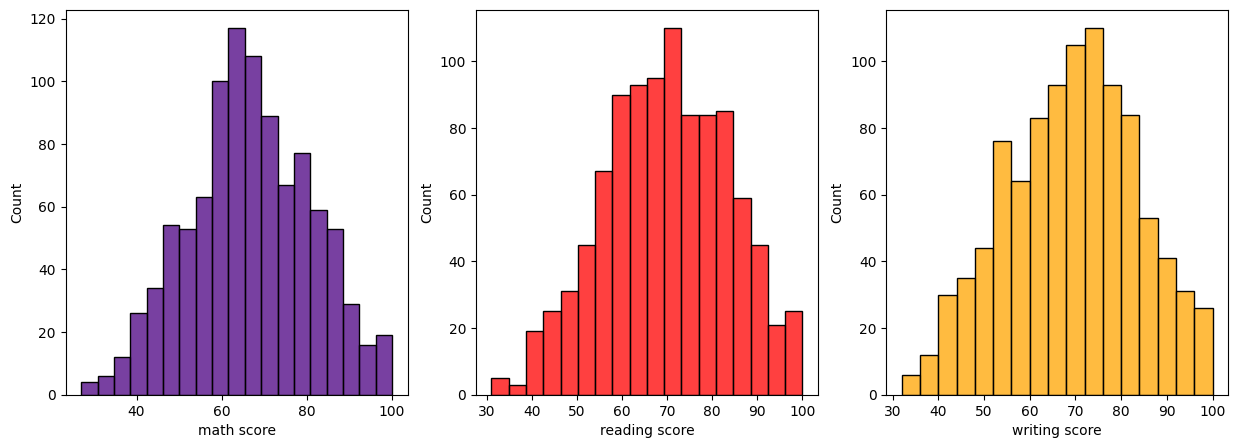

In [37]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))

sns.histplot(data['math score'], ax = axes[0], color = 'indigo')
sns.histplot(data['reading score'], ax = axes[1], color = 'red')
sns.histplot(data['writing score'], ax = axes[2], color = 'orange')

In [38]:
encoded_gender = pd.get_dummies(data['gender'], dtype = int)

In [39]:
encoded_gender.head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [43]:
data = pd.concat([data.drop('gender', axis = 1), encoded_gender], axis = 1)

In [45]:
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1


In [46]:
data.describe()

,math score,reading score,writing score,female,male
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,66.694726,69.723124,68.648073,0.516227,0.483773
std,14.340780,13.910716,14.427092,0.499990,0.499990
min,27.000000,31.000000,32.000000,0.000000,0.000000
25%,57.000000,60.000000,58.000000,0.000000,0.000000
50%,66.500000,70.000000,69.000000,1.000000,0.000000
75%,77.000000,80.000000,79.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000,1.000000


In [47]:
data['test preparation course'].nunique()

2

In [49]:
test_prep = pd.get_dummies(data['test preparation course'], dtype = int)

In [50]:
data = pd.concat([data.drop('test preparation course', axis = 1), test_prep], axis = 1)

In [51]:
data.head()

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,female,male,completed,none
0,group B,bachelor's degree,standard,72,72,74,1,0,0,1
1,group C,some college,standard,69,90,88,1,0,1,0
2,group B,master's degree,standard,90,95,93,1,0,0,1
3,group A,associate's degree,free/reduced,47,57,44,0,1,0,1
4,group C,some college,standard,76,78,75,0,1,0,1


In [54]:
data['race/ethnicity'].nunique()

5

In [55]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()
data['race'] = encoder.fit_transform(data['race/ethnicity'])

In [64]:
data.head()

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,female,male,completed,none,race
0,group B,bachelor's degree,standard,72,72,74,1,0,0,1,1
1,group C,some college,standard,69,90,88,1,0,1,0,2
2,group B,master's degree,standard,90,95,93,1,0,0,1,1
3,group A,associate's degree,free/reduced,47,57,44,0,1,0,1,0
4,group C,some college,standard,76,78,75,0,1,0,1,2


In [65]:
data.drop('race/ethnicity', axis = 1)

,parental level of education,lunch,math score,reading score,writing score,female,male,completed,none,race
0,bachelor's degree,standard,72,72,74,1,0,0,1,1
1,some college,standard,69,90,88,1,0,1,0,2
2,master's degree,standard,90,95,93,1,0,0,1,1
3,associate's degree,free/reduced,47,57,44,0,1,0,1,0
4,some college,standard,76,78,75,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...
995,master's degree,standard,88,99,95,1,0,1,0,4
996,high school,free/reduced,62,55,55,0,1,0,1,2
997,high school,free/reduced,59,71,65,1,0,1,0,2
998,some college,standard,68,78,77,1,0,1,0,3


In [67]:
def min_max_normalization(feature: str):
    global data
    data[feature] = (data[feature] - data[feature].min())/(data[feature].max() - data[feature].min())

In [72]:
min_max_normalization('math score')

In [73]:
data.head()

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,female,male,completed,none,race
0,group B,bachelor's degree,standard,0.616438,0.594203,74,1,0,0,1,1
1,group C,some college,standard,0.575342,0.855072,88,1,0,1,0,2
2,group B,master's degree,standard,0.863014,0.927536,93,1,0,0,1,1
3,group A,associate's degree,free/reduced,0.273973,0.376812,44,0,1,0,1,0
4,group C,some college,standard,0.671233,0.681159,75,0,1,0,1,2


<Axes: xlabel='math score', ylabel='Count'>

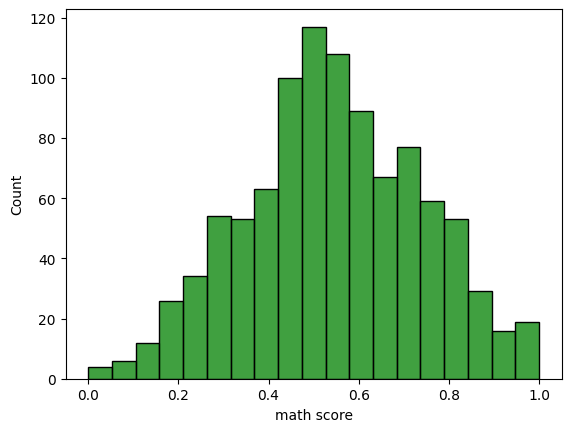

In [74]:
sns.histplot(data['math score'], color = 'green')

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [81]:
data['writing score'] = scaler.fit_transform(data[['writing score']])

In [82]:
data.head()

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,female,male,completed,none,race
0,group B,bachelor's degree,standard,0.616438,0.594203,0.371152,1,0,0,1,1
1,group C,some college,standard,0.575342,0.855072,1.342041,1,0,1,0,2
2,group B,master's degree,standard,0.863014,0.927536,1.688787,1,0,0,1,1
3,group A,associate's degree,free/reduced,0.273973,0.376812,-1.709324,0,1,0,1,0
4,group C,some college,standard,0.671233,0.681159,0.440501,0,1,0,1,2


<Axes: xlabel='writing score', ylabel='Count'>

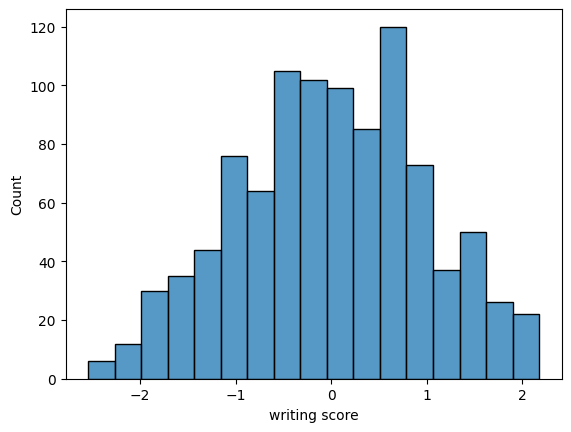

In [83]:
sns.histplot(data['writing score'])

<Axes: xlabel='writing score', ylabel='Count'>

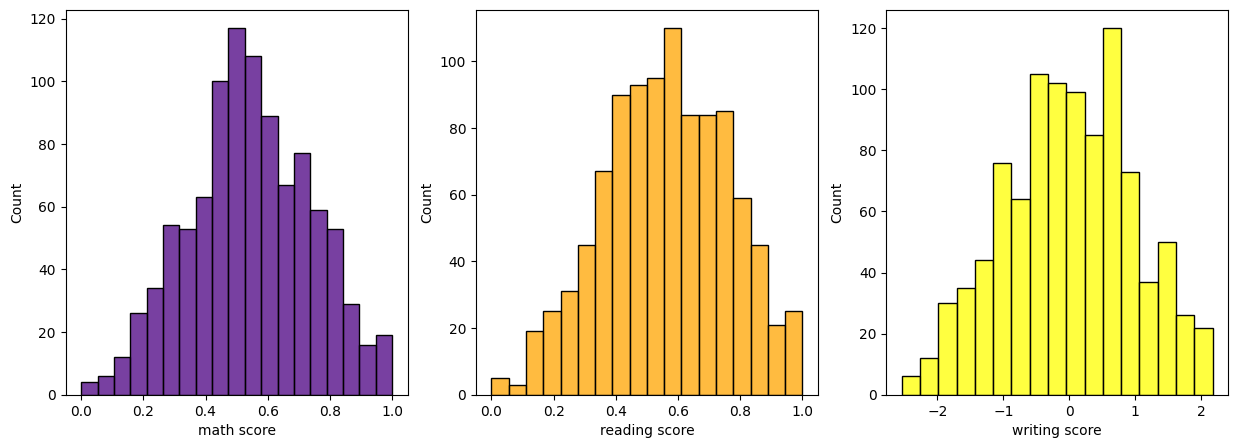

In [87]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.histplot(data['math score'], ax = axes[0] ,color = 'indigo')
sns.histplot(data['reading score'], ax = axes[1] ,color = 'orange')
sns.histplot(data['writing score'], ax = axes[2] ,color = 'yellow')

/var/folders/w2/r1ry0n8s5fd28dmlqqvd6wvm0000gn/T/ipykernel_25319/320209589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

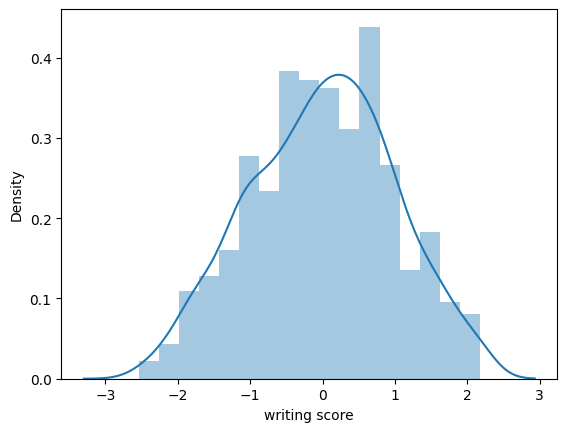

In [91]:
sns.distplot(data['writing score'])